# I - Un premier exemple de réseau de neurones

Notre objectif est de réaliser l'apprentissage supervisé de la fonction $x \mapsto f(x) = e^{2sin(x)}$ sur le compact [-3,3].

In [1]:
import numpy as np                              # pour manipuler les données
import matplotlib.pyplot as plt                 # pour faire des affichages graphiques

from sklearn.metrics import mean_squared_error  # une metrique pour la fonction de perte

Nous allons d'abord nous doter de données d'apprentissage artificielles et puis définir un réseau de neurone :

In [2]:
x = np.array([3*i/50 for i in range(-50,50)])     # input x
y = np.array([np.exp(2*np.sin(i)) for i in x])    # output f(x) = exp(2*sin(x))

Pour construire un réseau perceptron multi-couches le plus simplement possible, nous allons avoir recours à une structure "Sequential": https://keras.io/guides/sequential_model/, ce qui correspond au type de réseau auquel on s'intéresse, avec des couches denses : https://keras.io/api/layers/core_layers/dense/.

Il est possible de choisir une activation parmi plusieurs : https://keras.io/api/layers/activations/ . L' activation la plus restrictive est celle de la couche de sortie, car si elle est mal choisie, elle peut saboter l'apprentissage du réseau de neurones. Ici, puisque la sortie est positive et non majorée alors une activation finale ReLU est bienvenue.

In [3]:
# Pour définir le réseau de neurones artificel "forward multi-perceptron"
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU 

# exemples de fonctions activation
# activation = 'relu', 'sigmoid', 'softmax', 'tanh', 'LeakyReLU', 'selu', 'elu', 'exponential', ...

In [4]:
model = Sequential()

# Couche d'entrée - le nombre de neurones doit être cohérent avec la problématique, ici apprendre f(x)=exp(2*sin(x))
model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))

act = 'relu'
# Couches cachées - ici 7 couches
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))

# Couche de sortie - le nombre de neurones doit être cohérent avec la problématique, ici apprendre f(x)=exp(2*sin(x))
model.add(Dense(1))

Nous choisissons comme fonction de perte l'erreur quadratique moyenne *mean squarred error (mse)* et ADAM comme algortihme d'optimisation. 

https://keras.io/api/optimizers/ 

https://keras.io/api/models/model_training_apis/

In [5]:
# Apprentissage sur le jeu de donnée
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
10/10 [==============================] - 3s 3ms/step - loss: 6.7587
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 4.1662
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 3.8607
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 4.2878
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3.6563
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 4.2205
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 4.0233
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 3.7574
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5706
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 3.4453
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5843
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 3.3800
Epoch 13/100
10/10 [=================

L erreur quadratique moyenne est :  0.0032462063680614183


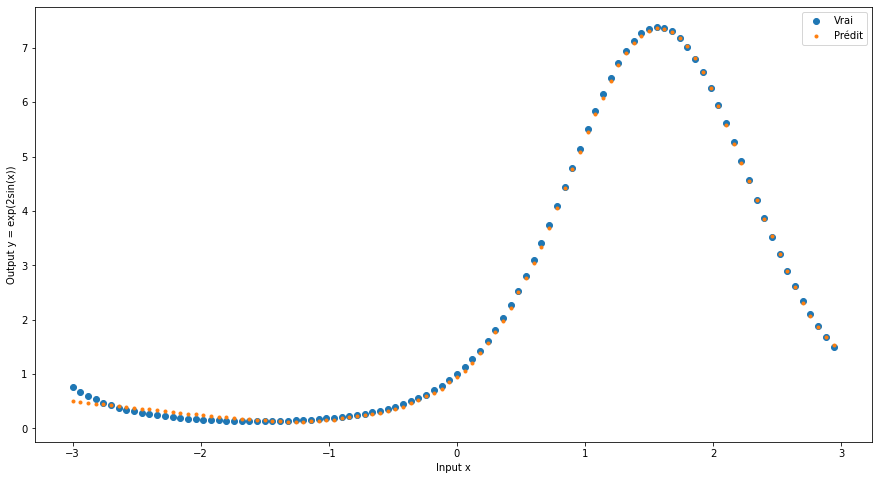

In [6]:
y_train   = model.predict(x)

print('L erreur quadratique moyenne est : ', mean_squared_error(y_train, y))

plt.figure(figsize=(15,8))
plt.scatter(x,y, label='Vrai')
plt.scatter(x,y_train, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

Modifions les points d'évaluation du réseau tout en restant sur le même support $[-3,3]$ afin de voir que le réseau n'a pas simplement retenu les valeurs de l'entrainement.

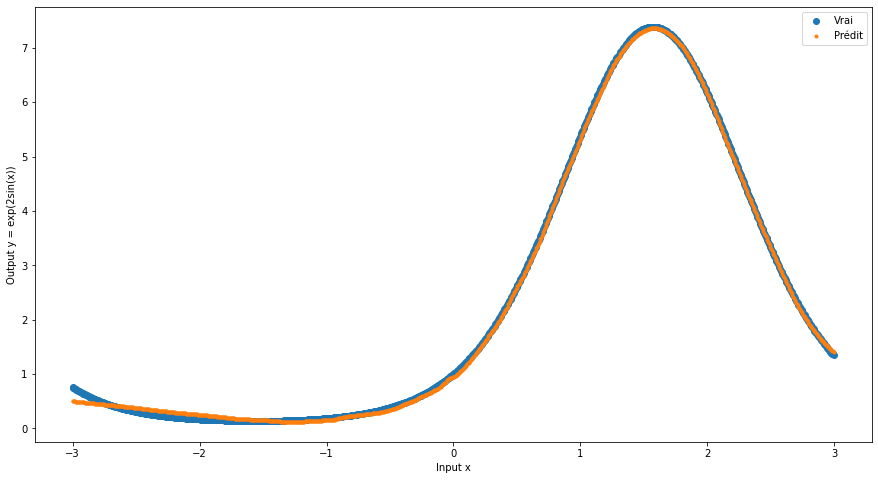

In [7]:
x1      = np.array([3*i/500 for i in range(-500,500)]) 
y1      = np.exp(2*np.sin(x1))
y_test1 = model.predict(x1)


plt.figure(figsize=(15,8))
plt.scatter(x1,y1, label = 'Vrai')
plt.scatter(x1,y_test1, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

Nous sommes plutôt satisfait de l'apprentissage sur le domaine $[-3,3]$. Il y'a certainement un sur-apprentissage mais nous ne nous penchons pas sur la question. 

Modifions les points d'évaluation du réseau pour le tester en dehors du support $[-3,3]$. On exhibe alors que l'approximation du réseau de neurones ne se généralise pas en dehors du support d'entrainement. 

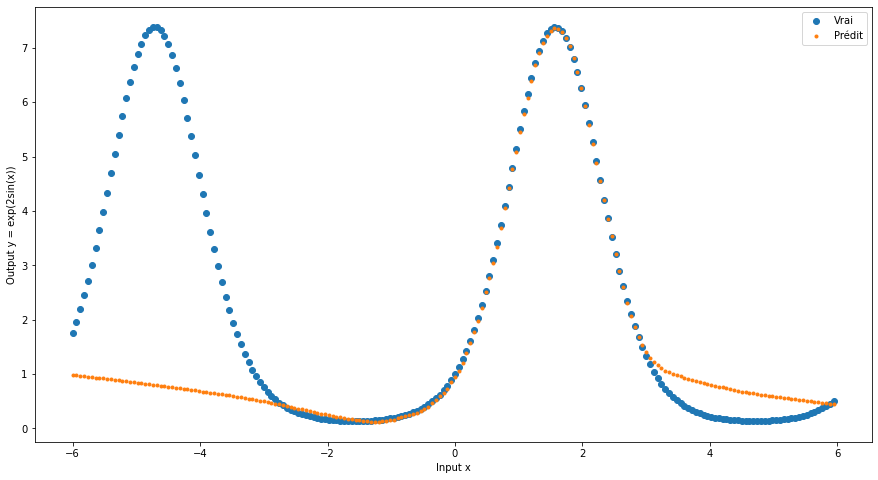

In [8]:
x2      = np.array([3*i/50 for i in range(-100,100)]) 
y2      = np.exp(2*np.sin(x2))
y_test2 = model.predict(x2)


plt.figure(figsize=(15,8))
plt.scatter(x2, y2, label = 'Vrai')
plt.scatter(x2,y_test2, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

# II - GAN sur données MNIST (handwritten digits dataset)

In [9]:
import numpy as np               # pour manipuler les données
import numpy.random as npr       # pour avoir des generateur aleatoire et fixer la graine pour la reproductibilite
import matplotlib.pyplot as plt  # pour faire des affichages graphiques

import tensorflow as tf           # pour accéder aux outils pour créer et entrainer les reseaux de neurones

from keras.datasets import mnist  # importer le dataset 

Afin d'alléger le code, nous définissons en dehors de la classe *GAN* les fonctions *build_generateur* et *build_discriminant* que nous allons utiliser comme méthodes de la classe *GAN*.




* https://keras.io/api/models/model/

* https://keras.io/api/layers/

* https://keras.io/api/layers/activations/

In [10]:
# Pour définir le réseau de neurones artificel "forward multi-perceptron"
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 

## Le Discriminant : 
* La couche d'entrée est composée d'autant de neurones que la dimension d'une image. On utilise la classe "Flatten" pour passer d'une dimension (28,28,1) à une dimension (784).

* Le nombre de couches cachées ainsi que leurs dimensions sont arbitrairement choisis. La phase d'entrainement montre que cettre structure convient. La fonction d'activation $LeakyReLU$ est choisie de sorte à ce qu'il n'y ait pas de saturation ou d'annulation de gradient.

$LeakyReLU(alpha = )$ = alpha * x si  x < 0 et x si x >= 0.

* Etant donné l'output qui doit être une probabilité, nous choisissons pour la dernière couche un seul neurone avec pour activation la fonction sigmoïd.

* Etant sur une problématique de classifcation, la métrique retnue pour le Discriminant est "Accuracy" = $\frac{prédictions.correctes}{nombre.total.de.prédiction}$

In [11]:
def build_discriminant(self):
    model = Sequential() # réseau de neurones

    # Couche d'entrée
    model.add(Flatten(input_shape = self.dim_image))

    # Couches cachées
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha = 0.2))

    # Couche de sortie 
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary() # affiche le sommaire du réseau

    image       = Input(shape = self.dim_image)
    probabilite = model(image)

    return Model(inputs = image, outputs = probabilite)

## Le Générateur :

* La couche d'entrée est composée d'autant de neurones que la dimension de l'espace de départ et que l'on peu choisir arbitrairement. Dans notre application, on favorise un espace de départ de dimension 100 < 784 dimension de l'espace de d'arrivée.

* Le nombre de couches cachées ainsi que leurs dimensions sont arbitrairement choisis. La phase d'entrainement montre que cette structure convient. La fonction d'activation $LeakyReLU$ est choisie de sorte à ce qu'il n'y ait pas de saturation ou d'annulation de gradient.

* Afin d'améliorer l'apprentissage, nous intégrons à l'architechture du réseau de neurones une étape de normalisation des données avant chaque couche cachée. Il s'agit d'une pratique courante pour accélérer l'apprentissage des réseaux de neuronnes.

* L'output doit être une image de dimension (28,28,1). Ainsi la dernière étape est de convertir l'output de la dernière couche à 784 neurones en format (28,28,1).

In [12]:
def build_generateur(self):
    
    model = Sequential() #  réseau de neurones

    # Couche d'entrée
    model.add(Dense(256, input_dim = self.dim_espace_G))
    model.add(LeakyReLU(alpha=0.2))

    # Couches cachées
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))

    # Couche de sortie + convertir la dimension de (784) a (28,28,1)
    model.add(Dense(np.prod(self.dim_image), activation='tanh'))
    model.add(Reshape(self.dim_image))

    model.summary() # affiche le sommaire du réseau

    prior = Input(shape = self.dim_espace_G)
    image = model(prior)

    return Model(inputs = prior, outputs = image)

In [16]:
def images_generateur(self, epoch, n_epoch, ligne = 3, colonne = 4):
      """ 
    methode de la classe GAN : afficher des images generees par le generateur
    ----------
    Parametres:
    ligne, colonne       :
        int, int - nombre d'image par colonne et par ligne
    n_epoch              : 
        int - nombre d'interation d'entrainement
    batch_size           :
        int - demi-taille d'un jeu de donnees d'entrainement, compose de (batch_size vraies donnees, batch_size fausses donnees)
    """
      G_data  = self.generateur.predict(npr.normal(0, 1, (ligne * colonne, self.dim_espace_G)))
      image = 0.5 * G_data + 0.5 # rescale [0, 1]
      fig, axs = plt.subplots(ligne, colonne)
      cnt = 0
      for i in range(ligne):
        for j in range(colonne):
            axs[i,j].imshow(image[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
      plt.show()
      print('epoch', epoch, "/", n_epoch,'\n')

In [17]:
class GAN():
  " construit les constituants d'un GAN, avec des parametres par defaut fixes"
  def __init__(self):
      self.dim_image = (28, 28, 1) # taille d'une image 28x28x1
      self.dim_espace_G = 128      # dimension de l'espace de départ du générateur

  # 1/3 - GENERATEUR
      self.generateur = self.build_generateur()
      prior = Input(shape = self.dim_espace_G)
      image = self.generateur(prior)

  # 2/3 - DISCRIMINANT
      self.discriminant = self.build_discriminant()
      self.discriminant.compile(  loss     = tf.keras.losses.BinaryCrossentropy(),
                                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5, beta_2=0.999, epsilon=1e-07),
                                 metrics   = tf.keras.metrics.BinaryAccuracy())
      probabilite = self.discriminant(image)

  # 3/3 - GAN 
# Dans la phase d'entrainement nous allons d'abord entrainer le discriminant, puis à paramètres du discrimianat fixés, nous allons entrainer le générateur.
# Ainsi pour l'etape du generateur, nous allons specifier l'attribut du discriminant "trainable" à "False", pour n'entrainer que les couches du generateur.
      self.discriminant.trainable = False
      self.generative_adversarial_network = Model(prior, probabilite)
      self.generative_adversarial_network.compile(loss      = tf.keras.losses.BinaryCrossentropy(),
                                                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5, beta_2=0.999, epsilon=1e-07))
      

  # Methodes pour etablir le generateur et le discriminant
  build_generateur     = build_generateur
  build_discriminant  = build_discriminant
  images_generateur    = images_generateur
    

In [18]:
def APPRENTISSAGE(self, n_epoch, batch_size=100, affichage_intervalle=50):
      """ 
    methode de la classe GAN : Apprentissage ("training") du GAN par descente de gradient stochastique
    ----------
    Parametres:

    n_epoch              : 
        int - nombre d'interation d'entrainement
    batch_size           :
        int - demi-taille d'un jeu de donnees d'entrainement, compose de (batch_size vraies donnees, batch_size fausses donnees)
    affichage_intervalle :
        int - intervalle d'affichage
    """
      (X_train, y_train), (x_test, y_test) = mnist.load_data() # charger les données -> X_train.shape = (60000,28,28)
      X_train = 2*(X_train/255) - 1                            # Max-Min normalisation [-1,1], pour ameliorer l'apprentissage
      X_train = np.expand_dims(X_train, axis=3)                # X_train.shape = (60000,28,28,1) -> 60k echantillons de 28x28x1

      correct = np.ones((batch_size, 1))  # classification correcte - true label
      fake    = np.zeros((batch_size, 1)) # classication erronee    - fake label
      
      D_loss     = []
      D_accuracy = []
      G_loss     = []
      npr.seed(1)   
      for epoch in range(n_epoch):

      #--- I - APPRENTISSAGE DISCRIMINANT

          # I - 1/2) Selction d'un mini-batch de données 
          index  = npr.randint(0, X_train.shape[0], batch_size)                               # selection aleatoire 
          T_data = X_train[index]                                                             # true - label
          G_data = self.generateur.predict(npr.normal(0, 1, (batch_size, self.dim_espace_G))) # fausses donnees du générateur, par transformation du prior gaussien standard - fake label
          # I - 2/2) Apprentissage du discriminant sur les données des mini-batch
          D_loss_true = self.discriminant.train_on_batch(x = T_data, y = correct) # - true label 
          D_loss_fake = self.discriminant.train_on_batch(x = G_data, y = fake)    # - fake label  
          D_loss.append(0.5*(D_loss_true[0] + D_loss_fake[0]))
          D_accuracy.append(0.5*(D_loss_true[1] + D_loss_fake[1])*100)


      #--- II - APPRENTISSAGE GENERATEUR
          g_loss = self.generative_adversarial_network.train_on_batch(x = npr.normal(0, 1, (batch_size, self.dim_espace_G)), y = correct)
          G_loss.append(g_loss)

            # affichage d'une image du générateur
          if epoch % affichage_intervalle == 0:
                self.images_generateur(epoch, n_epoch)

      epoch = [e for e in range(n_epoch)]
      plt.figure(num = 0, figsize=(15,8))
      plt.plot(epoch, G_loss,     label='Generateur Loss',      color = "blue")
      plt.plot(epoch, D_loss,     label='Discriminant Loss', color = "magenta")
      plt.title('Generateur Loss & Discriminant Loss')
      plt.xlabel('nb epochs')
      plt.ylabel('Loss')
      plt.legend()

      plt.figure(num = 1, figsize=(15,7))
      plt.plot(epoch, D_accuracy, label='Discriminant Accuracy', color = "red")
      plt.title('Discriminant Accuracy')
      plt.xlabel('nb epochs')
      plt.ylabel('Pourcentage')
      plt.legend()


GAN.APPRENTISSAGE = APPRENTISSAGE

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               33024     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                      

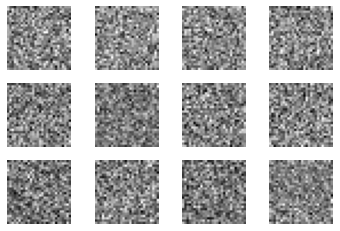

epoch 0 / 5000 



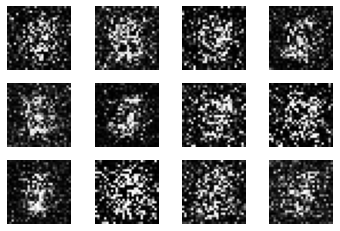

epoch 100 / 5000 



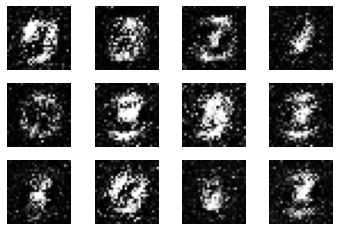

epoch 200 / 5000 



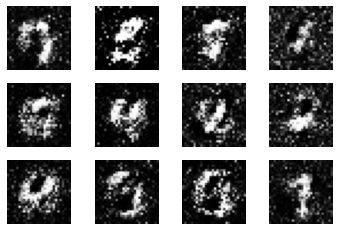

epoch 300 / 5000 



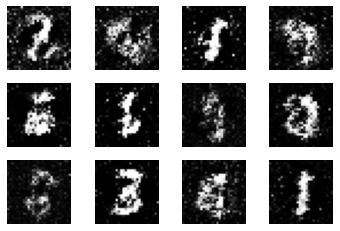

epoch 400 / 5000 



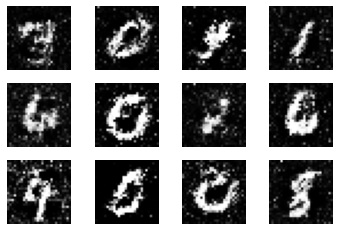

epoch 500 / 5000 



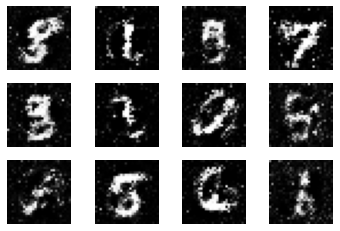

epoch 600 / 5000 



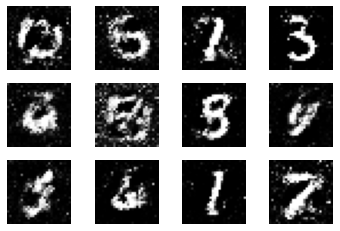

epoch 700 / 5000 



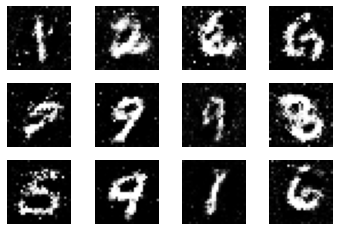

epoch 800 / 5000 



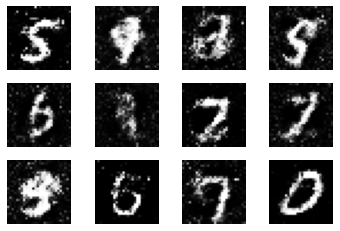

epoch 900 / 5000 



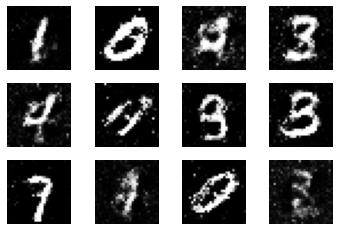

epoch 1000 / 5000 



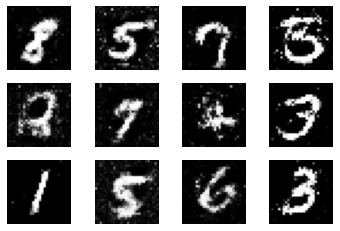

epoch 1100 / 5000 



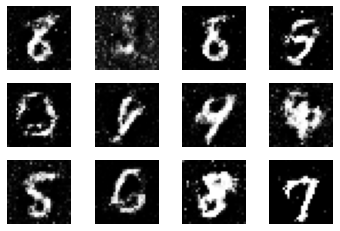

epoch 1200 / 5000 



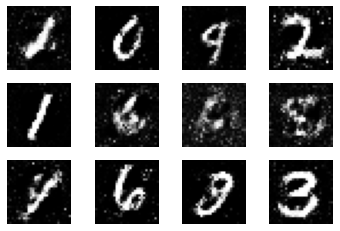

epoch 1300 / 5000 



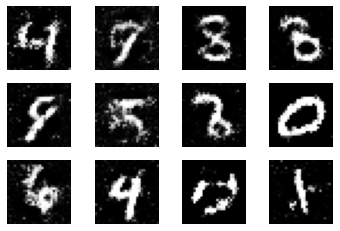

epoch 1400 / 5000 



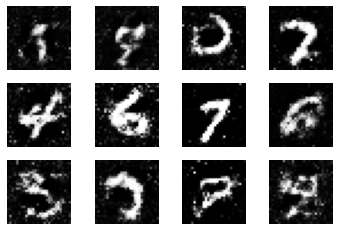

epoch 1500 / 5000 



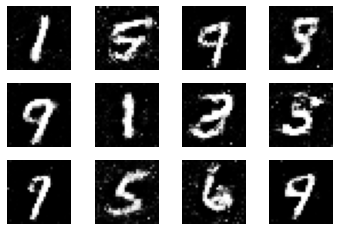

epoch 1600 / 5000 



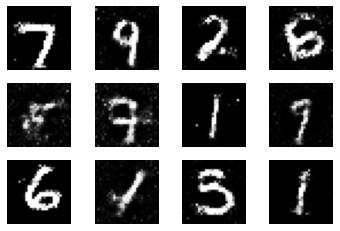

epoch 1700 / 5000 



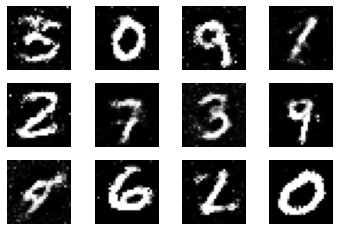

epoch 1800 / 5000 



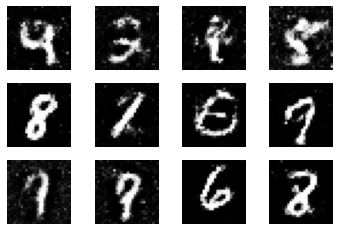

epoch 1900 / 5000 



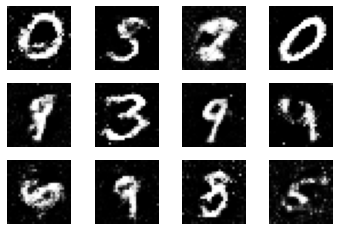

epoch 2000 / 5000 



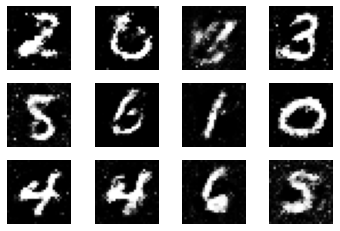

epoch 2100 / 5000 



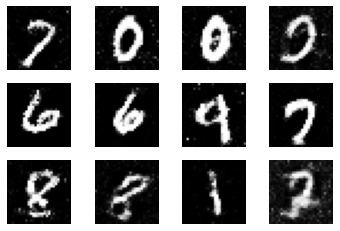

epoch 2200 / 5000 



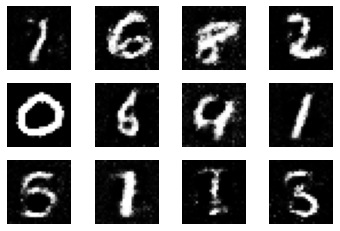

epoch 2300 / 5000 



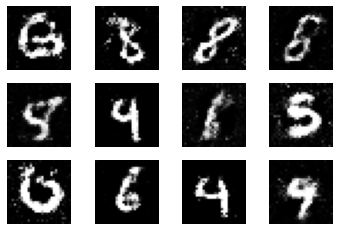

epoch 2400 / 5000 



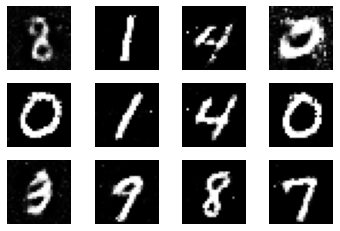

epoch 2500 / 5000 



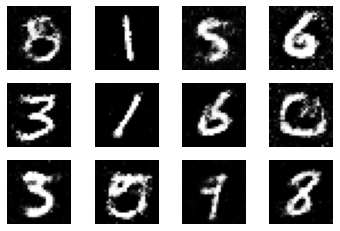

epoch 2600 / 5000 



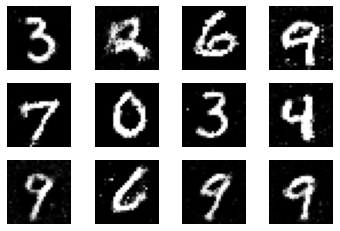

epoch 2700 / 5000 



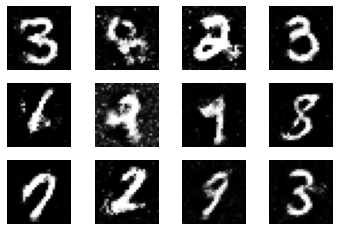

epoch 2800 / 5000 



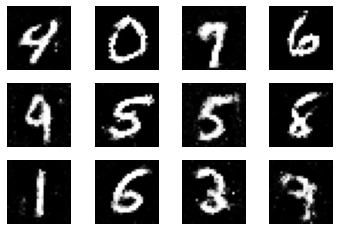

epoch 2900 / 5000 



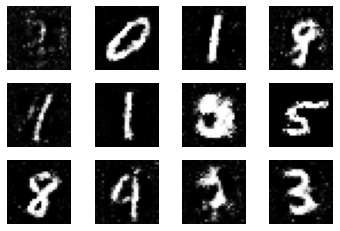

epoch 3000 / 5000 



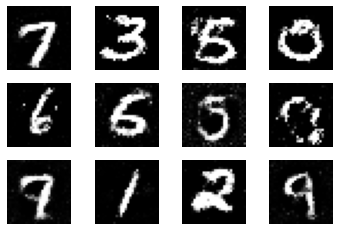

epoch 3100 / 5000 



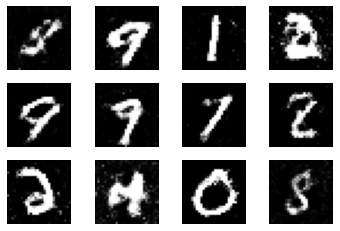

epoch 3200 / 5000 



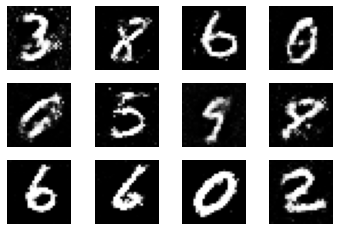

epoch 3300 / 5000 



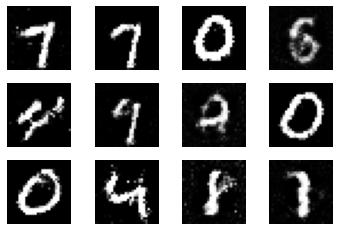

epoch 3400 / 5000 



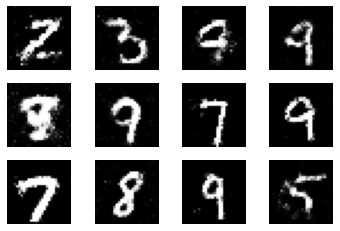

epoch 3500 / 5000 



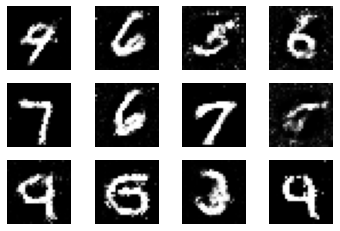

epoch 3600 / 5000 



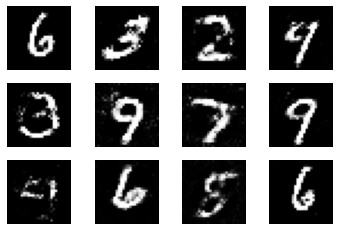

epoch 3700 / 5000 



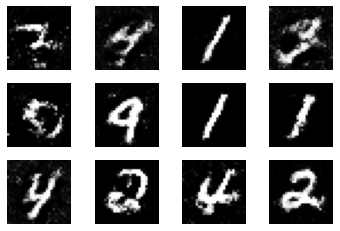

epoch 3800 / 5000 



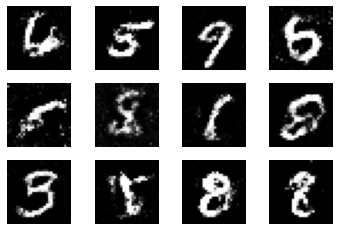

epoch 3900 / 5000 



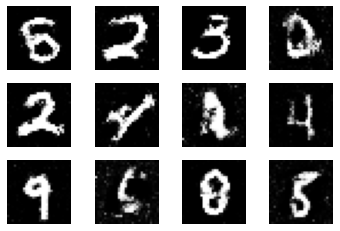

epoch 4000 / 5000 



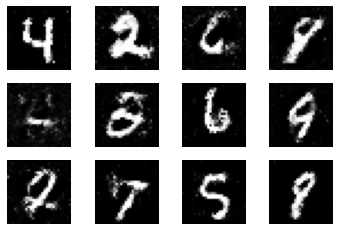

epoch 4100 / 5000 



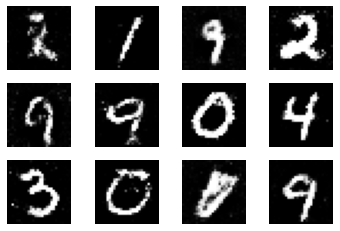

epoch 4200 / 5000 



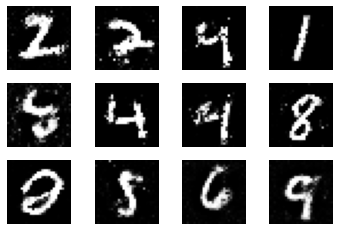

epoch 4300 / 5000 



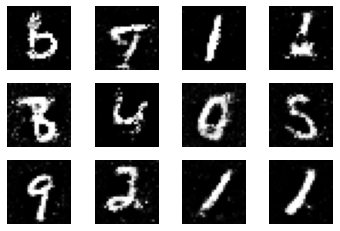

epoch 4400 / 5000 



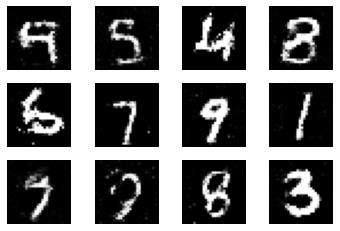

epoch 4500 / 5000 



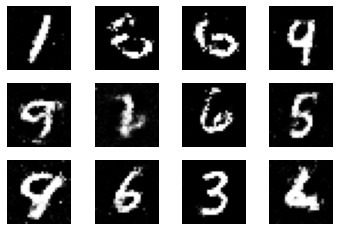

epoch 4600 / 5000 



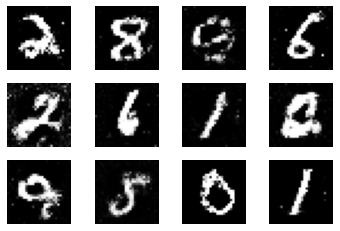

epoch 4700 / 5000 



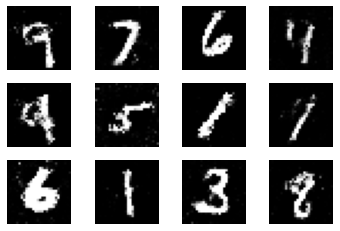

epoch 4800 / 5000 



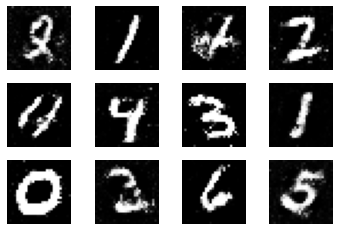

epoch 4900 / 5000 



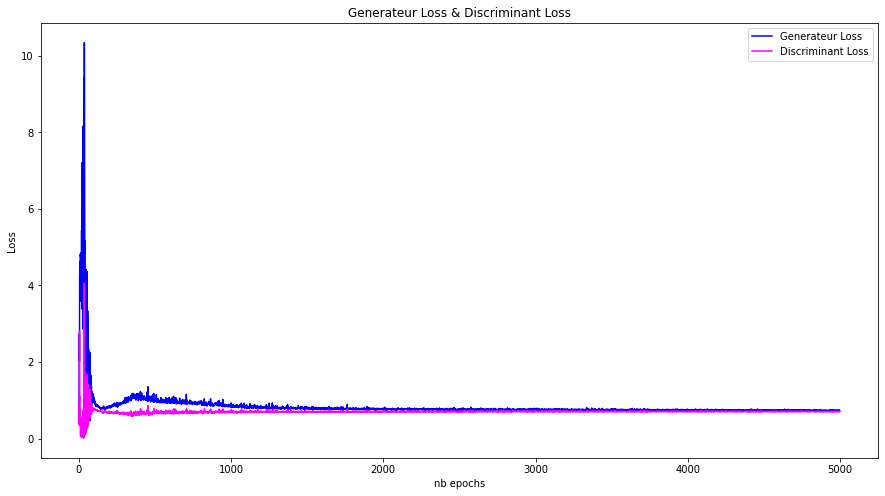

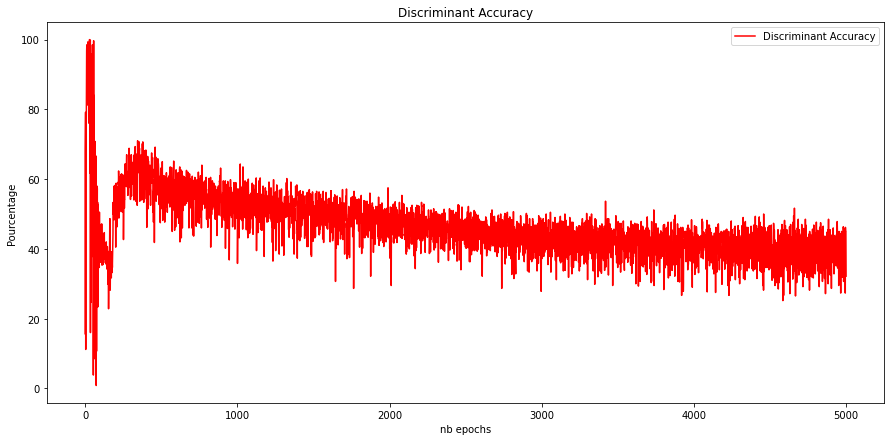

In [20]:
gan = GAN()
gan.APPRENTISSAGE(n_epoch=5000, batch_size=300, affichage_intervalle=100)

* On observe sur le premier graphique les fonctions de perte du Générateur et du Discriminant au cours des étapes d'apprentissage.
* Sur le second graphique on observe une convergence de la précision du Discriminant vers 50%. Néanmoins, le choix d'une structure en réseau de neurones présente aussi ses inconvénients, nous sommes limités dans notre approximation du Discriminant et Générateur parfaits.
* Temps de calcul 7min 22 en GPU.

*Référence : https://github.com/eriklindernoren/Keras-GAN* 